# **2. Which countries have improved the most in terms of medal performance?**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('athlete_events.csv')

In [ ]:
NOCs = pd.read_csv('noc_regions.csv')

In [ ]:
NOCs.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [ ]:
# Create a new column to indicate 1 if the country has a medal and 0 if they are NaN
data['Medal_Indicator'] = data['Medal'].apply(lambda x: 1 if pd.notna(x) else 0)

In [ ]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Medal_Indicator
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,0


In [ ]:
data.size

4337856

In [ ]:
# Create a new table that maps each country to its total medal count (Medal_Indicator) for every year
# This dataframe will count a medal for each unique sport for every year for every NOC
# Every NOC should have no duplicate sports for every year
medal_winners = data[data['Medal_Indicator'] == 1]

#country_medals = data.groupby(['Year', 'NOC'])['Medal_Indicator'].sum().reset_index()

In [ ]:
# There can be multiple events under the same sport, so it should look for duplicate events
unique_athletes = medal_winners.drop_duplicates(subset=['Year', 'NOC', 'Event'])

In [ ]:
country_medals = unique_athletes.groupby(['Year', 'NOC'])['Medal_Indicator'].sum().reset_index()
country_medals.head()

,Year,NOC,Medal_Indicator
0,1896,AUS,3
1,1896,AUT,5
2,1896,DEN,6
3,1896,FRA,8
4,1896,GBR,8


In [ ]:
country_medals.size

4326

In [ ]:
country_medals.head()

,Year,NOC,Medal_Indicator
0,1896,AUS,3
1,1896,AUT,5
2,1896,DEN,6
3,1896,FRA,8
4,1896,GBR,8


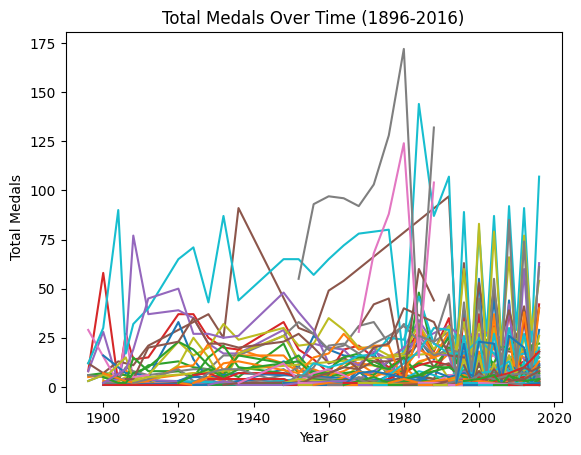

In [ ]:
# create a plot for each country to map its medal count over time
for country in country_medals['NOC'].unique():
    country_data = country_medals[country_medals['NOC'] == country]
    plt.plot(country_data['Year'], country_data['Medal_Indicator'], label=country)
plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.title('Total Medals Over Time (1896-2016)')
plt.show()

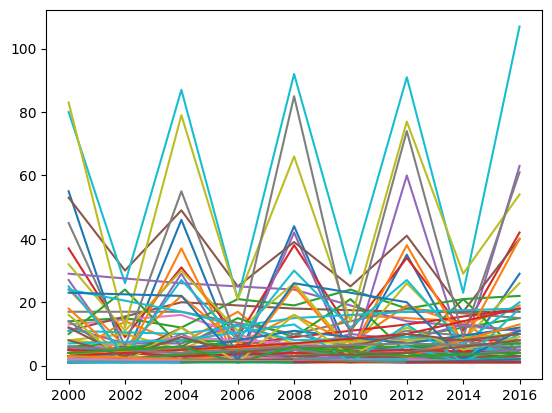

In [ ]:
# Revise this plot to only include 2000 and onwards
for country in country_medals['NOC'].unique():
    country_data = country_medals[(country_medals['NOC'] == country) & (country_medals['Year'] >= 2000)]
    plt.plot(country_data['Year'], country_data['Medal_Indicator'], label=country)

In [ ]:
# Find the unique number of countries in this list
# CHECK COUNTRY CODES THAT ARE THE SAME FOR MULTIPLE COUNTRIES
country_medals['NOC'].nunique()

149

In [ ]:
# Filter country_medals so only years 2000 and after are included in the table
country_medals_after_2000 = country_medals[country_medals['Year'] >= 2000]

In [ ]:
# Create a formula that calculates the total percentage change in the number of medals for each country
country_medals_after_2000['Percentage_Change'] = country_medals_after_2000.groupby('NOC')['Medal_Indicator'].pct_change() * 100

<ipython-input-15-91183d3c9f2b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_medals_after_2000['Percentage_Change'] = country_medals_after_2000.groupby('NOC')['Medal_Indicator'].pct_change() * 100


In [ ]:
country_medals_after_2000.tail(10)

,Year,NOC,Medal_Indicator,Percentage_Change
1432,2016,TPE,3,50.000000
1433,2016,TTO,1,-75.000000
1434,2016,TUN,3,0.000000
1435,2016,TUR,8,100.000000
1436,2016,UAE,1,0.000000
1437,2016,UKR,11,450.000000
1438,2016,USA,107,365.217391
1439,2016,UZB,13,333.333333
1440,2016,VEN,3,200.000000
1441,2016,VIE,2,100.000000


In [ ]:
# filter the country_medals table for only the year 2016
# This is because it is the most recent year in the dataset
country_medals_2016 = country_medals_after_2000[country_medals_after_2000['Year'] == 2016]

In [ ]:
# Replace the inf values with 0
country_medals_2016[np.isinf(country_medals_2016['Percentage_Change'])].replace([np.inf, -np.inf], 0)
# Sort the dataframe from largest percentage change to smallest
country_medals_2016['Percentage_Change'].unique()

array([ 100.        ,    0.        ,   33.33333333,  866.66666667,
        -92.85714286,   80.        ,           nan,    5.88235294,
         50.        ,    4.76190476,  577.77777778,  900.        ,
        -21.42857143,   25.        ,   66.66666667,  -50.        ,
         16.66666667,  -80.        ,  281.81818182, 1475.        ,
        -14.28571429,  135.29411765,  200.        ,  -16.66666667,
        -66.66666667,  -27.27272727,  -60.        ,  225.        ,
        471.42857143, 1700.        ,   71.42857143,  185.71428571,
        -20.        ,  150.        ,   46.15384615,  -75.        ,
        -80.95238095,   38.46153846,   83.33333333,  -55.55555556,
         86.20689655,  -30.        ,  300.        ,  -15.38461538,
        450.        ,  365.2173913 ,  333.33333333])

In [ ]:
# Drop all inf in the Percentage_Change column
country_medals_2016 = country_medals_2016.drop(country_medals_2016[np.isinf(country_medals_2016['Percentage_Change'])].index)

In [ ]:
# Drop NaN
country_medals_2016 = country_medals_2016.dropna()

In [ ]:
# Filter country_medals_2016 from highest percentage change to lowest
country_medals_2016 = country_medals_2016.sort_values(by='Percentage_Change', ascending=False)

In [ ]:
# Take the top 10 countries with the largest percentage change in medals
# Percentage change is useful because some countries may have more athletes or enter in more games
# This accounts for the variability in team size
top_10 = country_medals_2016.head(10)
top_10

,Year,NOC,Medal_Indicator,Percentage_Change
1401,2016,KAZ,18,1700.000000
1385,2016,GBR,63,1475.000000
1373,2016,CRO,10,900.000000
1359,2016,AUS,29,866.666667
1370,2016,CHN,61,577.777778
1400,2016,JPN,40,471.428571
1437,2016,UKR,11,450.000000
1438,2016,USA,107,365.217391
1439,2016,UZB,13,333.333333
1428,2016,SVK,4,300.000000


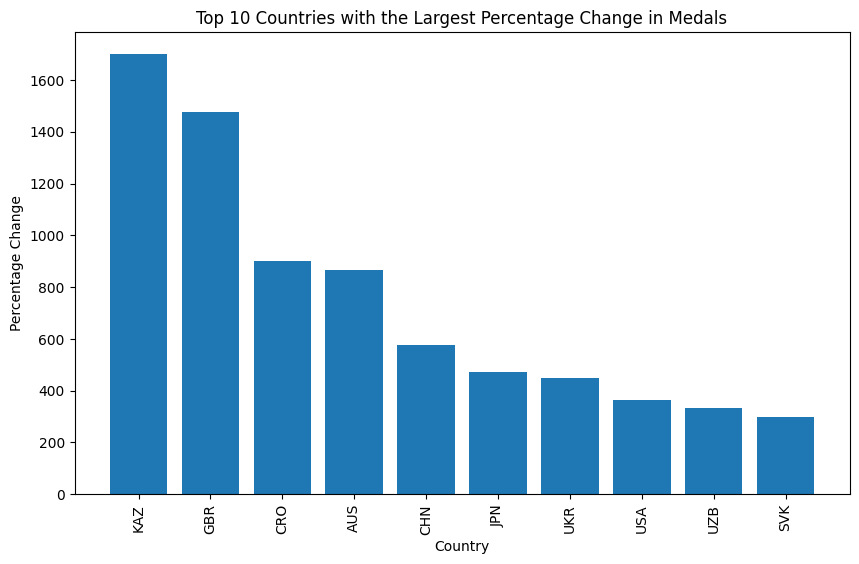

In [ ]:
# Plot all 10 countries in top_10
plt.figure(figsize=(10, 6))
plt.bar(top_10['NOC'], top_10['Percentage_Change'])
plt.xlabel('Country')
plt.ylabel('Percentage Change')
plt.title('Top 10 Countries with the Largest Percentage Change in Medals')
plt.xticks(rotation=90)
plt.show()
# Look into what made these countries performed and what changed
# If they started playing more sports, more athletes, age of athletes... etc

## What caused KAZ, GBR, and CRO to have such a large increase?

As we can see in the plot below, the percentage change was only accounting for the previous year's value. This is the reason why KAZ had a 1700% increase because the formula was only accounting for the previous games (2014) when comparing it to 2016. This observation indicates that a better formula (such as the mean medal count) needs to be used to compare the countries' performance over time.

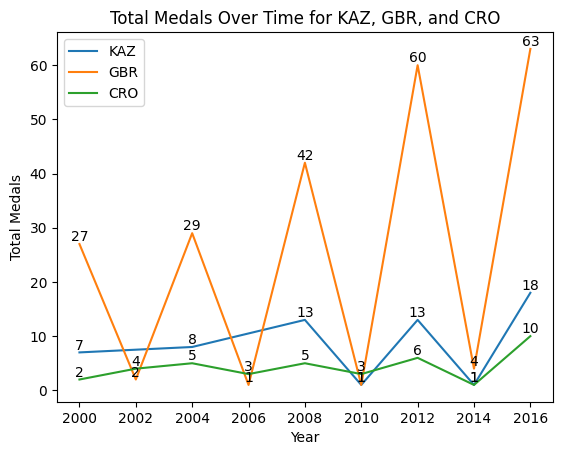

In [ ]:
# Plot each countries (KAZ, GBR, and CRO) total medal count from 2000-2016 over that period of time
for country in ['KAZ', 'GBR', 'CRO']:
    country_data = country_medals_after_2000[country_medals_after_2000['NOC'] == country]
    plt.plot(country_data['Year'], country_data['Medal_Indicator'], label=country)
    # Label each data point with its value
    for x, y in zip(country_data['Year'], country_data['Medal_Indicator']):
        plt.text(x, y, str(y), ha='center', va='bottom')
plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.title('Total Medals Over Time for KAZ, GBR, and CRO')
plt.legend()

## Try finding the percentage change of the countries' means

Instead of looking at the immediate games' prior performance to compare the values over time, we instead looked at the mean number of medals won as a whole and how each year either decreased or increased the country's mean medal count. This is a more thoughtful way to compare the performance over time as the mean includes outliers (very high or low medal counts) from the time period as a whole.

In [ ]:
# Create a new column in country_medals_after_2000 that calculates the mean medal_indicator for that NOC for the current year and all previous years
# country_medals_after_2000['Mean_Medal_Indicator'] = country_medals_after_2000.groupby('NOC')['Medal_Indicator'].transform('mean')
mean_medals = []
for i in range(len(country_medals_after_2000)):
    country = country_medals_after_2000.iloc[i]['NOC']
    year = country_medals_after_2000.iloc[i]['Year']
    mean = country_medals_after_2000[(country_medals_after_2000['NOC'] == country) & (country_medals_after_2000['Year'] <= year)]['Medal_Indicator'].mean()
    mean_medals.append(mean)
country_medals_after_2000['Mean_Medal_Indicator'] = mean_medals

<ipython-input-25-13ab5b316405>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_medals_after_2000['Mean_Medal_Indicator'] = mean_medals


In [ ]:
country_medals_after_2000.tail()

,Year,NOC,Medal_Indicator,Percentage_Change,Mean_Medal_Indicator
1437,2016,UKR,11,450.000000,15.142857
1438,2016,USA,107,365.217391,61.777778
1439,2016,UZB,13,333.333333,6.200000
1440,2016,VEN,3,200.000000,1.750000
1441,2016,VIE,2,100.000000,1.333333


In [ ]:
# filter just for the NOC "CHN" to see if it works
country_medals_after_2000[country_medals_after_2000['NOC'] == "CHN"]

,Year,NOC,Medal_Indicator,Percentage_Change,Mean_Medal_Indicator
943,2000,CHN,45,NaN,45.000000
1014,2002,CHN,6,-86.666667,25.500000
1044,2004,CHN,55,816.666667,35.333333
1112,2006,CHN,8,-85.454545,28.500000
1147,2008,CHN,85,962.500000,39.800000
1223,2010,CHN,9,-89.411765,34.666667
1259,2012,CHN,74,722.222222,40.285714
1334,2014,CHN,9,-87.837838,36.375000
1370,2016,CHN,61,577.777778,39.111111


In [ ]:
# Now create a new dataframe to visualize the percentage change for each country's mean_medal_indicator over time
country_medals_after_2000['Mean_Percentage_Change'] = country_medals_after_2000.groupby('NOC')['Mean_Medal_Indicator'].pct_change() * 100

<ipython-input-28-fcc32844d25b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_medals_after_2000['Mean_Percentage_Change'] = country_medals_after_2000.groupby('NOC')['Mean_Medal_Indicator'].pct_change() * 100


In [ ]:
country_medals_after_2000.tail()

,Year,NOC,Medal_Indicator,Percentage_Change,Mean_Medal_Indicator,Mean_Percentage_Change
1437,2016,UKR,11,450.000000,15.142857,-4.360902
1438,2016,USA,107,365.217391,61.777778,10.071764
1439,2016,UZB,13,333.333333,6.200000,37.777778
1440,2016,VEN,3,200.000000,1.750000,31.250000
1441,2016,VIE,2,100.000000,1.333333,33.333333


In [ ]:
mean_pct_2016 = country_medals_after_2000[country_medals_after_2000['Year'] == 2016]
mean_pct_2016 = mean_pct_2016.sort_values(by='Mean_Percentage_Change', ascending=False)

In [ ]:
top_10_mean = mean_pct_2016.head(10)

In [ ]:
# Map the NOC code in the top_10_mean to the country in the NOC table
top_10_mean = top_10_mean.merge(NOCs[['region', 'NOC']], on='NOC')
top_10_mean.head(10)

,Year,NOC,Medal_Indicator,Percentage_Change,Mean_Medal_Indicator,Mean_Percentage_Change,region_x,region_y
0,2016,MAS,5,150.000000,2.666667,77.777778,Malaysia,Malaysia
1,2016,BRN,2,100.000000,1.500000,50.000000,Bahrain,Bahrain
2,2016,SRB,8,100.000000,5.000000,42.857143,Serbia,Serbia
3,2016,UZB,13,333.333333,6.200000,37.777778,Uzbekistan,Uzbekistan
4,2016,AZE,18,80.000000,8.600000,37.600000,Azerbaijan,Azerbaijan
5,2016,VIE,2,100.000000,1.333333,33.333333,Vietnam,Vietnam
6,2016,VEN,3,200.000000,1.750000,31.250000,Venezuela,Venezuela
7,2016,COL,8,0.000000,4.200000,29.230769,Colombia,Colombia
8,2016,NZL,18,38.461538,9.600000,28.000000,New Zealand,New Zealand
9,2016,RSA,10,66.666667,5.600000,24.444444,South Africa,South Africa


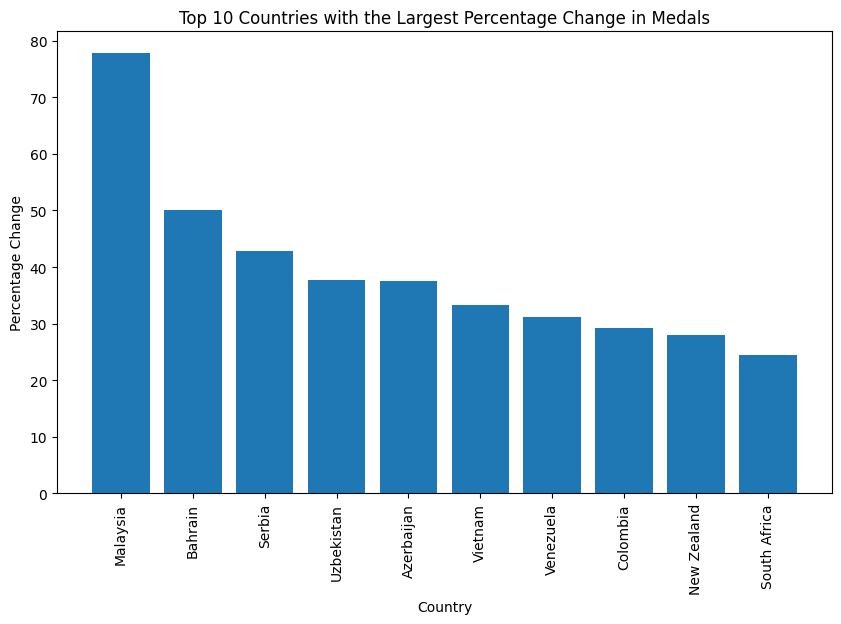

In [ ]:
# Plot all 10 countries in top_10_mean
plt.figure(figsize=(10, 6))
plt.bar(top_10_mean['region'], top_10_mean['Mean_Percentage_Change'])
plt.xlabel('Country')
plt.ylabel('Percentage Change')
plt.title('Top 10 Countries with the Largest Percentage Change in Medals')
plt.xticks(rotation=90)
plt.show()

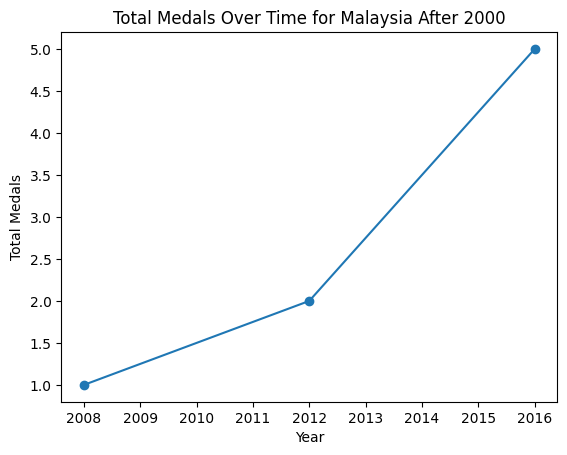

In [ ]:
# Plot out Malaysia's participation in the olympics over the years
malaysia_data = country_medals_after_2000[country_medals_after_2000['NOC'] == 'MAS']
plt.plot(malaysia_data['Year'], malaysia_data['Medal_Indicator'], marker="o")
plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.title('Total Medals Over Time for Malaysia After 2000')
plt.show()

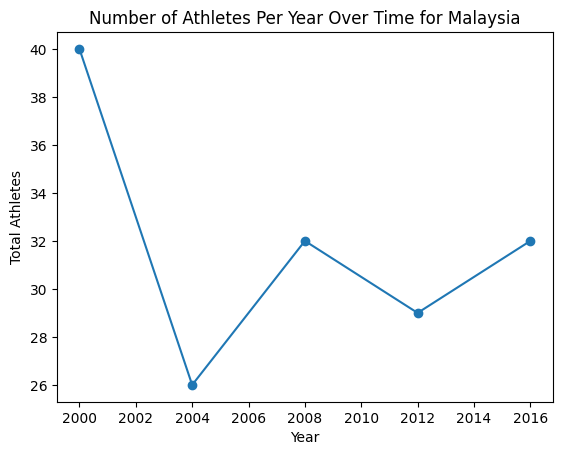

In [ ]:
# Plot the number of athletes (sum of the count of athletes) per year for MAS
mas_athletes = data[data['NOC'] == 'MAS']
# Plot where only the year 2000 and after is shown
mas_athletes = mas_athletes[mas_athletes['Year'] >= 2000]
mas_athletes = mas_athletes.groupby('Year')['Name'].nunique().reset_index()
plt.plot(mas_athletes['Year'], mas_athletes['Name'], marker="o")
plt.title('Number of Athletes Per Year Over Time for Malaysia')
plt.xlabel('Year')
plt.ylabel('Total Athletes')
plt.show()

Text(0, 0.5, 'Total Events')

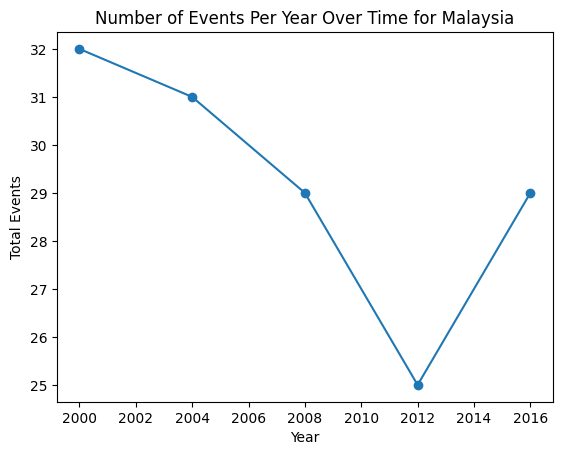

In [ ]:
# Plot the number of unique events (sum of the count of events) per year for MAS
mas_events = data[data['NOC'] == 'MAS']
mas_events = mas_events[mas_events['Year'] >= 2000]
mas_events = mas_events.groupby('Year')['Event'].nunique().reset_index()
plt.plot(mas_events['Year'], mas_events['Event'], marker="o")
plt.title('Number of Events Per Year Over Time for Malaysia')
plt.xlabel('Year')
plt.ylabel('Total Events')


# **3. How have Olympic sports evolved over time in terms of athlete demographics?**

For every 10 years in the dataset, plot the average age weight and height of the athletes

In [ ]:
# Preprocess the data to eliminate duplicate olympian names
olympians = data.drop_duplicates(subset=['Name'])
olympians.size

2155712

In [ ]:
# Drop NA olympian height, weight, and age
olympians = olympians.dropna(subset=['Height', 'Weight', 'Age'])
olympians.size

1575088

In [ ]:
# Normalize the age, weight, and height data
# Using a library to normalize
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
#olympians[['Age', 'Weight', 'Height']] = scaler.fit_transform(olympians[['Age', 'Weight', 'Height']])
olympians.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Medal_Indicator
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,0
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,0
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,0
18,7,John Aalberg,M,31.0,183.0,72.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,0


In [ ]:
# Create a new dataframe with the average weight and height of the athletes every 10 years
avg_weight = []
avg_height = []
avg_age = []
year_bucket = []
for year in range(1896, 2016, 7):
    start_year = year
    end_year = year + 7
    for y in range(start_year, end_year):
      year_bucket.append(y)
      avg_weight.append(olympians[(olympians['Year'] >= start_year) & (olympians['Year'] < end_year)]['Weight'].mean())
      avg_height.append(olympians[(olympians['Year'] >= start_year) & (olympians['Year'] < end_year)]['Height'].mean())
      avg_age.append(olympians[(olympians['Year'] >= start_year) & (olympians['Year'] < end_year)]['Age'].mean())

avg_10_years = pd.DataFrame({'Year': year_bucket, 'Average_Weight': avg_weight, 'Average_Height': avg_height, 'Average_Age': avg_age})

In [ ]:
avg_10_years.head(15)

,Year,Average_Weight,Average_Height,Average_Age
0,1896,72.024390,174.804878,23.097561
1,1897,72.024390,174.804878,23.097561
2,1898,72.024390,174.804878,23.097561
3,1899,72.024390,174.804878,23.097561
4,1900,72.024390,174.804878,23.097561
5,1901,72.024390,174.804878,23.097561
6,1902,72.024390,174.804878,23.097561
7,1903,72.709746,176.826271,23.550847
8,1904,72.709746,176.826271,23.550847
9,1905,72.709746,176.826271,23.550847


In [ ]:
# Append the average columns to the original "data" dataframe. This will make the numbers easier
# to inverse transform
# Add the first average in for the first 10 years, the second average in for the second 10 years... etc
# Merge data on the year and fill the columns with the corresponding values
# Change 'Year' to 'Year_Bucket' to match the column name in avg_10_years
merged_data = olympians.merge(avg_10_years, how='right', on='Year') # Changed 'Year' to 'Year_Bucket'
# Assign the result to a new variable instead of modifying 'data' in-place
# This avoids potential issues and allows you to keep the original 'data' DataFrame
# Drop average weight x, average height x, average age x
merged_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Medal_Indicator,Average_Weight,Average_Height,Average_Age
0,16616.0,"Thomas Edmund ""Tom"" Burke",M,21.0,183.0,66.0,United States,USA,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's 100 metres,Gold,1.0,72.02439,174.804878,23.097561
1,22700.0,James Brendan Bennet Connolly,M,27.0,175.0,72.0,United States,USA,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's High Jump,Silver,1.0,72.02439,174.804878,23.097561
2,24423.0,"Thomas Pelham ""Tom"" Curtis",M,23.0,176.0,66.0,United States,USA,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's 100 metres,NaN,0.0,72.02439,174.804878,23.097561
3,29084.0,Kurt Wilhelm Doerry,M,21.0,179.0,73.0,Germany,GER,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's 100 metres,NaN,0.0,72.02439,174.804878,23.097561
4,32330.0,Launceston Elliot,M,21.0,188.0,102.0,Great Britain,GBR,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's 100 metres,NaN,0.0,72.02439,174.804878,23.097561


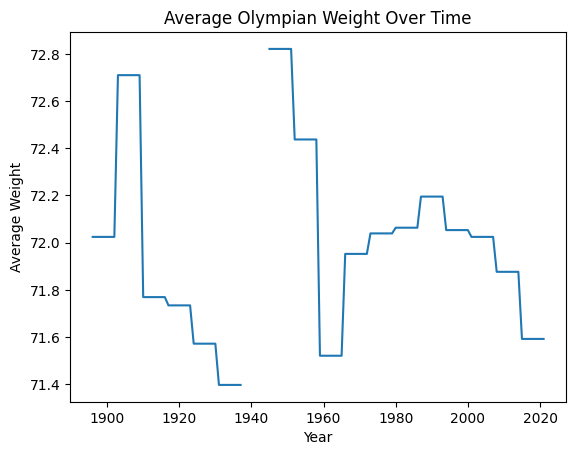

In [ ]:
plt.plot(avg_10_years['Year'], avg_10_years['Average_Weight'], label='Average Weight')
plt.xlabel('Year')
plt.ylabel('Average Weight')
plt.title('Average Olympian Weight Over Time')
plt.show()

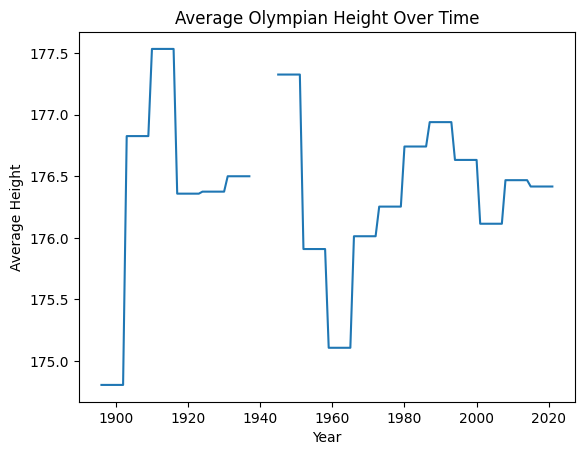

In [ ]:
plt.plot(avg_10_years['Year'], avg_10_years['Average_Height'], label='Average Height')
plt.xlabel('Year')
plt.ylabel('Average Height')
plt.title('Average Olympian Height Over Time')
plt.show()

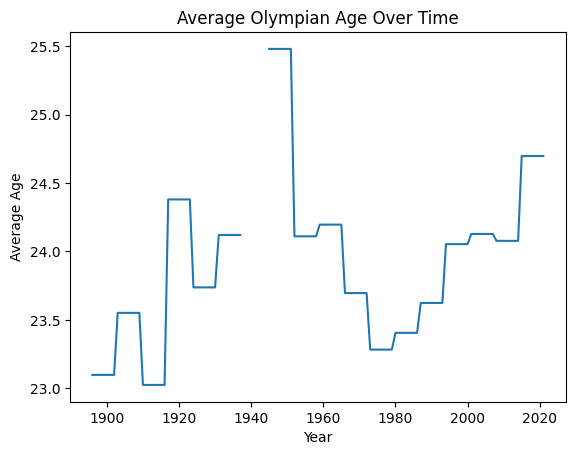

In [ ]:
plt.plot(avg_10_years['Year'], avg_10_years['Average_Age'], label='Average Age')
plt.xlabel('Year')
plt.ylabel('Average Age')
plt.title('Average Olympian Age Over Time')
plt.show()

In [ ]:
# Both the weight and the height had almost identical distributions
# During the same range of years athletes were larger, then smaller, then larger again

In [ ]:
# Try doing an average for each year
# Create a new dataframe with the average weight and height of the athletes every 10 years
avg_weight = []
avg_height = []
avg_age = []
year_bucket = []
for year in range(1896, 2016, 2):
  year_bucket.append(year)
  avg_weight.append(olympians[(olympians['Year'] == year)]['Weight'].mean())
  avg_height.append(olympians[(olympians['Year'] == year)]['Height'].mean())
  avg_age.append(olympians[(olympians['Year'] == year)]['Age'].mean())

print(avg_weight)
per_year_demo = pd.DataFrame({'Year': year_bucket, 'Average_Weight': avg_weight, 'Average_Height': avg_height, 'Average_Age': avg_age})

[np.float64(69.9090909090909), nan, np.float64(72.8), nan, np.float64(70.71111111111111), np.float64(75.14423076923077), np.float64(72.44604316546763), nan, np.float64(71.76923076923077), nan, nan, nan, np.float64(71.73417721518987), nan, np.float64(71.7557003257329), nan, np.float64(71.4238845144357), nan, np.float64(70.17695473251028), nan, np.float64(71.96190476190476), nan, nan, nan, nan, nan, np.float64(72.82094081942337), nan, np.float64(72.11855670103093), nan, np.float64(72.69722455845248), nan, np.float64(71.34653346172364), nan, np.float64(71.6949723358191), nan, np.float64(71.61625471302891), nan, np.float64(72.23356704645049), nan, np.float64(72.03921143847487), nan, np.float64(72.61622132891937), nan, np.float64(71.67766413724843), nan, np.float64(72.03452345824726), nan, np.float64(72.3792899408284), np.float64(73.14873417721519), np.float64(72.10662824207493), np.float64(72.56796116504854), np.float64(71.78179442508711), np.float64(73.00407709414381), np.float64(71.80286

In [ ]:
# Every year doesn't show as much of a trend as every 10 years as there are a lot of gaps in the ages
per_year_demo.head(15)

,Year,Average_Weight,Average_Height,Average_Age
0,1896,69.909091,173.818182,22.454545
1,1898,NaN,NaN,NaN
2,1900,72.800000,175.166667,23.333333
3,1902,NaN,NaN,NaN
4,1904,70.711111,175.888889,23.533333
5,1906,75.144231,177.384615,24.750000
6,1908,72.446043,176.920863,23.107914
7,1910,NaN,NaN,NaN
8,1912,71.769231,177.534413,23.024291
9,1914,NaN,NaN,NaN


In [ ]:
# Append the average columns to the original "data" dataframe. This will make the numbers easier
# to inverse transform
# Add the first average in for the first 10 years, the second average in for the second 10 years... etc
# Merge data on the year and fill the columns with the corresponding values
# Change 'Year' to 'Year_Bucket' to match the column name in avg_10_years
merged_data = olympians.merge(avg_10_years, how='right', on='Year') # Changed 'Year' to 'Year_Bucket'
# Assign the result to a new variable instead of modifying 'data' in-place
# This avoids potential issues and allows you to keep the original 'data' DataFrame
# Drop average weight x, average height x, average age x
merged_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Medal_Indicator,Average_Weight,Average_Height,Average_Age
0,16616.0,"Thomas Edmund ""Tom"" Burke",M,21.0,183.0,66.0,United States,USA,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's 100 metres,Gold,1.0,72.02439,174.804878,23.097561
1,22700.0,James Brendan Bennet Connolly,M,27.0,175.0,72.0,United States,USA,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's High Jump,Silver,1.0,72.02439,174.804878,23.097561
2,24423.0,"Thomas Pelham ""Tom"" Curtis",M,23.0,176.0,66.0,United States,USA,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's 100 metres,NaN,0.0,72.02439,174.804878,23.097561
3,29084.0,Kurt Wilhelm Doerry,M,21.0,179.0,73.0,Germany,GER,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's 100 metres,NaN,0.0,72.02439,174.804878,23.097561
4,32330.0,Launceston Elliot,M,21.0,188.0,102.0,Great Britain,GBR,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's 100 metres,NaN,0.0,72.02439,174.804878,23.097561
